# Decision tree overfitting

- When using decision trees, there is a risk of overfitting because it is simple for the tree to grow too complicated and fit specifics of the individual data points instead of the general characteristics of the distributions they are drawn from. Random forests can be used to solve this problem.

- This issue can be addressed by using random forests.

- Ensemble learning in machine learning is the practice of combining multiple models to try and achieve higher overall model performance.

- In general, ensembles consist of multiple heterogeneous or homogeneous models trained on the same dataset.

- Each of these models is used to make predictions using input (either exactly the same, or samples out of the same data), then aggregated across all models in some way (e.g. by taking the mean or having a weighted mean) to produce the final output.

- The random forest is an example of a commonly used ensemble model.

# What is a random forest?

- A random forest is a powerful non-parametric algorithm and an ensemble method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees.

- The ensembled trees are randomized and the output is the aggregated prediction of the individual trees.
- The mean prediction is used for a regression problem while classification problems use the mode of the ensembled trees as opposed to the mean.


# So our question is Why Random forest over a Decision Tree?

- In the vast landscape of machine learning, one technique stands out for its remarkable ability to harness the collective wisdom of multiple models: random forests. These enigmatic ensembles combine the predictive prowess of individual decision trees to yield results that often surpass the capabilities of any single tree. But how exactly do random forests work, and what makes them so effective?

- One popular ensemble learning method for both regression and classification issues is the Random Forest Algorithm. With the help of this potent method, the accuracy and resilience of the combined forecast are increased by combining the predictions made by several decision trees. 

- A random forest is a powerful non-parametric algorithm and an ensemble method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees.

- The ensembled trees are randomized and the output is the aggregated prediction of the individual trees.

- The mean prediction is used for a regression problem while classification problems use the mode of the ensembled trees as opposed to the mean.

- The ability of the Random Forest Algorithm to handle data sets with both continuous variables — as in regression — and categorical variables — as in classification — is one of its most crucial properties. In tasks involving regression and classification, it performs better. We will learn how random forests operate in this tutorial and apply them to a classification job.

# Working of Random Forest Algorithm

- Before understanding the working of the random forest algorithm in machine learning, we must look into the ensemble learning technique. Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

# Ensemble uses two types of methods:

Bagging
- It uses replacement to build a distinct training subset from sample training data, and majority voting determines the final result. A good exmaple of this is a Random Forest.






# How do random forests work?
### Fitting the data:

Keep in mind that `N` refers to the **number of observations** (rows) in the training dataset, and `p` is the **number of predictor variables** (columns). The following is the typical algorithm for a random forest:

1. **Bootstrapping**: Drawing *with replacement* from the training dataset, randomly sampled `N` observations.
<br>

2. Use the `N` observations to **grow a random forest tree** as follows:<br>
_<br>
At each node:<br>
i. Select a random subset, `m`, of predictor variables, where $m<\sqrt{p}$.<br>. 
- Usually, 'm' is set to the square root of the total number of predictor variables, denoted as sqrt{p} . This step introduces randomness into the model and helps prevent individual trees from being too correlated.

ii. Pick the best variable/split-point among the selected predictor variables.<br>
iii. Divide data into two subsets based on the selected split.<br>
iv. Repeat until stopping criteria satisfied (e.g. minimum node sample size reached)._
<br>

3. Repeat until **desired number of random forest trees** is reached.

Since we draw randomly, with replacement, from the training data during the bootstrapping step it is possible that:
- Some data **samples get resampled** and thus reused when fitting different trees in the random forest;
- Some data **samples don't get sampled at all** and thus do not get used in fitting the random forest.

This means that the **dataset each tree is grown on** is **slightly different**, so random forests are **less likely to overfit** than decision trees.

### Making predictions:

Random forests **combine multiple trees to make a prediction** as follows:

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/random_forest.png">

The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting! (An estimator is a tree.)

# For example

Consider the fruit basket as the data as shown in the figure below. Now n number of samples are taken from the fruit basket, and an individual decision tree is constructed for each sample. Each decision tree will generate an output, as shown in the figure. The final output is considered based on majority voting. In the below figure, you can see that the majority decision tree gives output as an apple when compared to a banana, so the final output is taken as an apple.

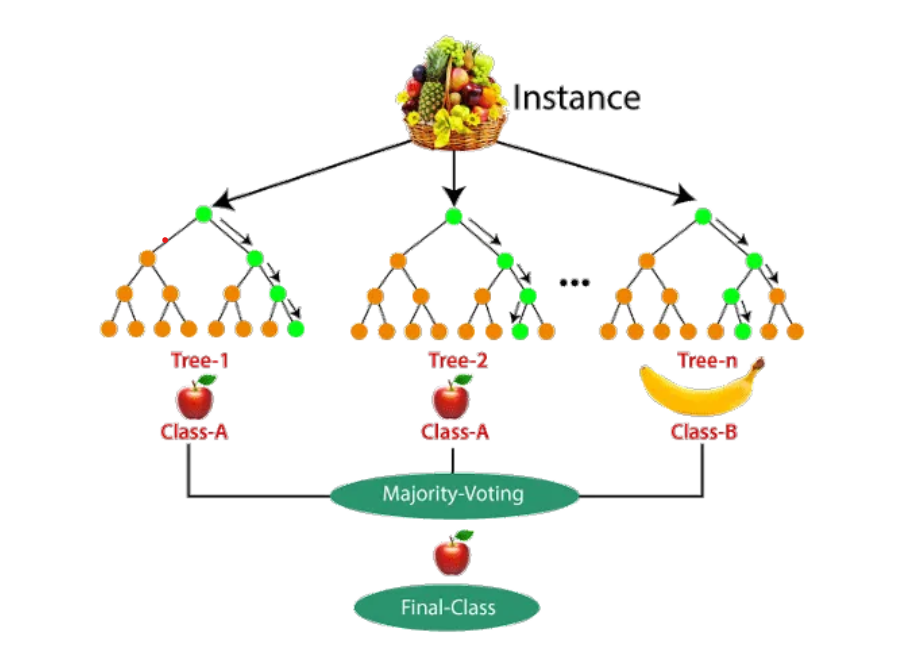


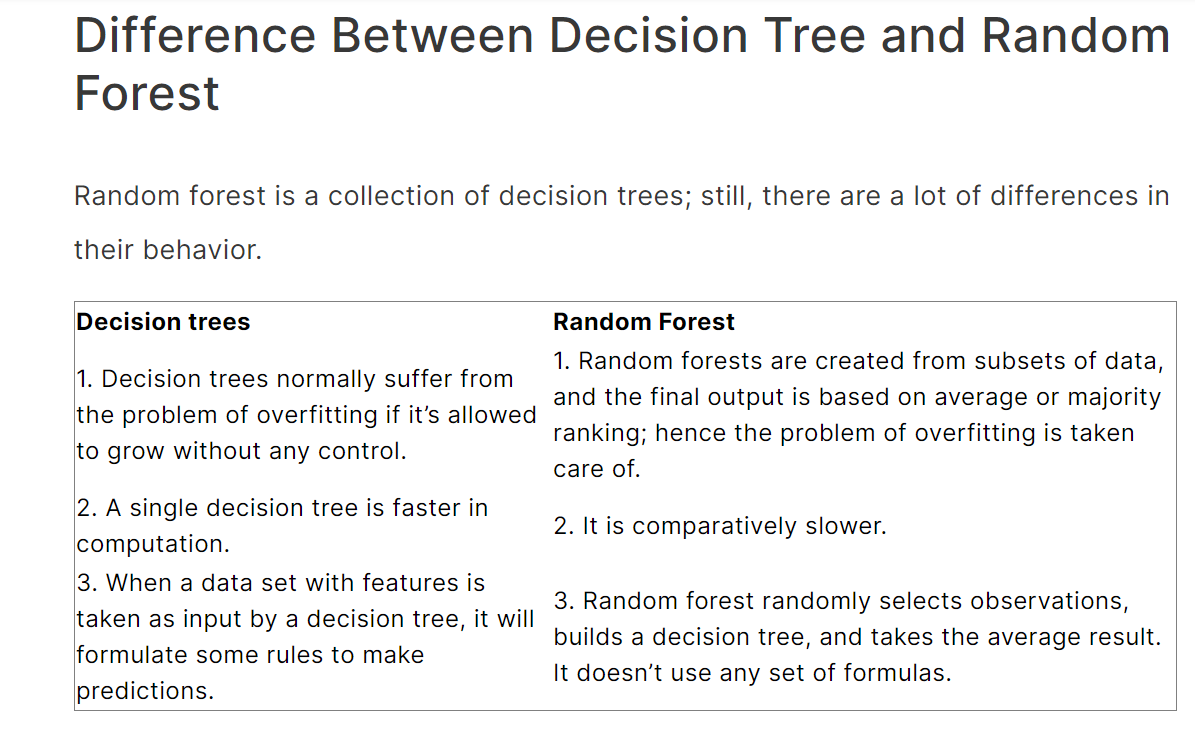

# Building a random forest regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
dataset = pd.read_csv("Salary_Data.csv")

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

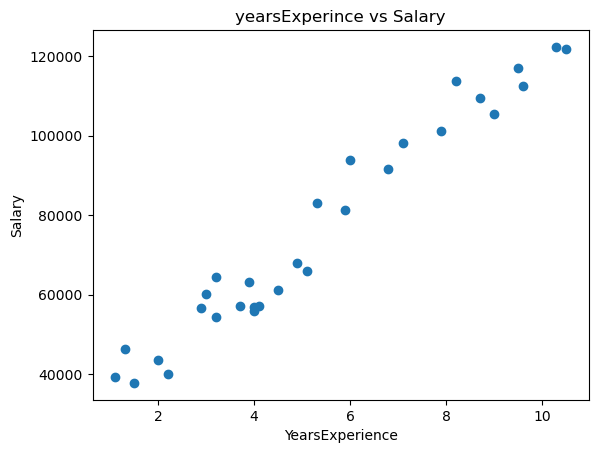

In [9]:
# Plotting the data

X = dataset["YearsExperience"] # independent variable 
y = dataset["Salary"] # dependent variable 

plt.scatter(X,y) # create scatter plot
plt.title("yearsExperince vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

- From te scatter plot we can see that there is  alinear relationship between the years of Exprience and Salary.

### Preprocessing

In [10]:
# standardize features
scaler = StandardScaler()
# Convert to numpy array first to apply np.newaxis
X_scaled = scaler.fit_transform(np.array(X)[:,np.newaxis])

- scaler = StandardScaler(): This line creates an instance of the StandardScaler class. StandardScaler is a method for standardizing features by removing the mean and scaling to unit variance. It's a common technique used to preprocess data before feeding it into machine learning algorithms, especially those that rely on distance measures or gradient-based optimization.

- X_scaled = scaler.fit_transform(np.array(X)[:,np.newaxis]): This line applies the standardization process to the data X. Here's what's happening:

- np.array(X): This converts the input X into a NumPy array. It's assumed that X is some form of data structure (like a list or pandas DataFrame) containing the features to be standardized.

- [:, np.newaxis]: This part is indexing. It's used to add a new axis to the array. The np.newaxis here effectively converts a 1D array into a 2D array. This is required because fit_transform expects a 2D array as input.

- scaler.fit_transform(): This method fits the scaler to the data (computes the mean and standard deviation) and then transforms the data based on that fit. It's a convenient method that combines the fit and transform steps into one. After this line executes, X_scaled will contain the standardized features.

In [11]:
# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

### Training

This process of fitting a decision tree to our data can be done in `Scikit-Learn` with the ``RandomForestRegressor`` estimator:

As with decision trees, random forests also have hyperparameters, some of the more important ones include:



- ***n_estimators*** — the number of decision trees you will be running in the model
- ***criterion*** — this variable allows you to select the criterion (loss function) used to determine model outcomes. We can select from loss functions such as mean squared error (MSE) and mean absolute error (MAE). The default value is MSE.
- ***max_depth*** — this sets the maximum possible depth of each tree
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
- ***max_features*** — the maximum number of features the model will consider when determining a split
- ***bootstrap*** — the default value for this is True, meaning the model follows bootstrapping principles (defined earlier)
- ***max_samples*** — This parameter assumes bootstrapping is set to True, if not, this parameter doesn’t apply. In the case of True,this value sets the largest size of each sample for each tree.
- **random_state**: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit() - _this particular hyperparameter is important in random forests since their training procedure is inherently random._

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
Randomforest = RandomForestRegressor(n_estimators=100, max_depth=5)
Randomforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

# testing

- To evaluate the performance of our model, we can report the mean squared error or plot predicted output vs expected output.

In [14]:
# Get predictions
y_pred = Randomforest.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 7765.3787426304425


- The interpretation of MSE depends on the scale of the target variable. In this case, since the target variable is 'Salary', the RMSE value of approximately 7765.3787 suggests that, on average, the squared difference between predicted and actual salaries is around 7765.3787. 

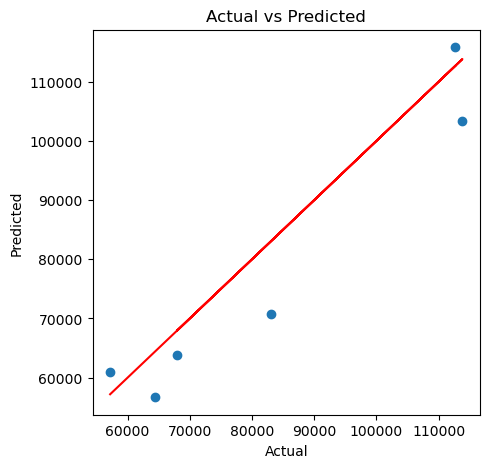

In [15]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot actual vs predicted values on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

- By examining how closely the scatter plot points align with the red line, we can gauge the performance of the model. Ideally, the scatter plot points should cluster closely around the red line, indicating accurate predictions.

### Tuning Model Hyperparameters 

In most cases, the default hyperpameter values do not offer the best model performance. In such cases, we have to **tune model hyperparameters** to **yield the the best performing model**.

Let's make some changes to the `n_estimators` parameter and compare the results:

### Training the various models:

In [16]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [17]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [18]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [19]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

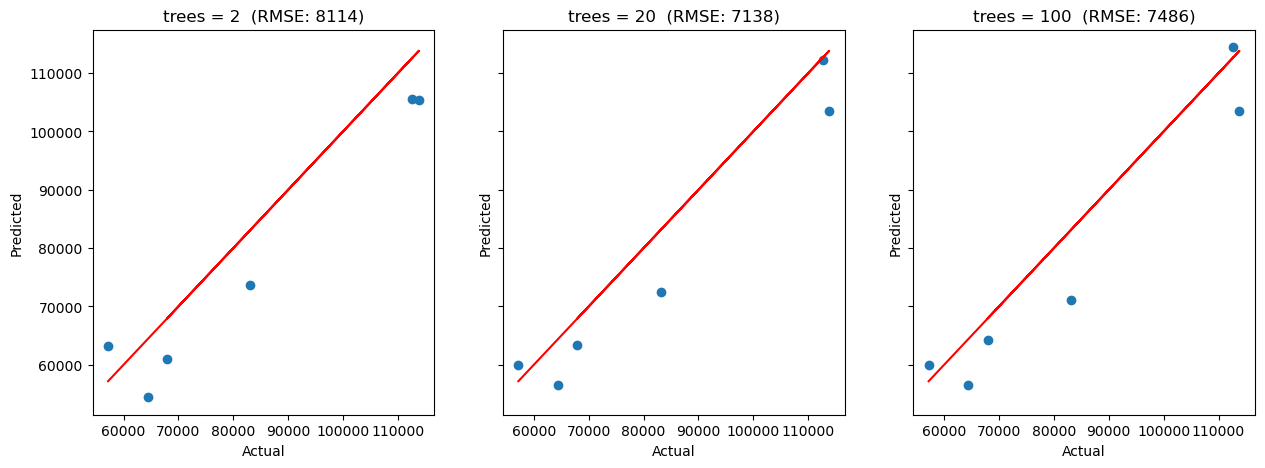

In [20]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

Based solely on the provided RMSE values:

-  2, the RMSE is 8114.
-  20, the RMSE is 7138.
- 100, the RMSE is 7486.

Among these options, the model with 20 has the lowest RMSE (7138), indicating better performance compared to the other models. Therefore, based on the RMSE values provided, the model with 20 trees performed the best.

# Can we find the optimal parameters (including `max_depth` and `min_samples_leaf`)?

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [2, 20, 100],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Create RandomForestRegressor
rf = RandomForestRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 20}


Here's what each parameter represents:

- max_depth: This parameter controls the maximum depth of each tree in the random forest. A value of None means that there is no maximum depth, and the trees are grown until all leaves are pure or until they contain min_samples_split samples.

- min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. A lower value allows the model to capture more detailed patterns in the training data, potentially leading to overfitting.

- n_estimators: This parameter determines the number of trees in the random forest ensemble. Increasing the number of trees generally improves the performance of the model until a certain point, after which the marginal benefit decreases.

In the provided example:

- max_depth is set to None, indicating that the trees are grown until all leaves are pure or contain min_samples_split samples.
- min_samples_leaf is set to 1, meaning that each leaf node must contain at least one sample.
- n_estimators is set to 20, indicating that the random forest ensemble consists of 20 trees.


- Therefore, we can infer that the optimal random forest model, based on the provided parameters, tends towards complexity. It allows for decision trees with potentially unlimited depth and requires only one sample per leaf node, which can capture intricate patterns in the data. Additionally, using a moderate number of trees (20) helps balance the model's complexity and predictive performance.

## 4. Assessing variable importance

Knowing the **predictive power** - how different predictive variables affect the model's performance - can prove useful in cases where the dataset is large and high-dimensional. 

It allows us to establish **which predictive variables we can discard** without significantly affecting the model's performance. Additionally, models that are presented with fewer predictor variables tend to train faster.  

Unlike decision trees, random forests can be used to calculate a **measure of predictor variable importance**. 

One way to compute this measure in the regression setting is to use the training data that was left out when constructing the random forest. Then the variable importance for a given variable can be calculated by:

1. Keeping other variables the same;
2. Shuffling the value of the variable in question;
3. Calculating the percentage increase in MSE.

## Advantages & disadvantages of random forests

**Advantages:**

* Less overfitting compared to a single decision tree (i.e. generalizes much better).
* Requires little data preparation - e.g. no real need to standardize features.
* Extremely flexible and usually have high prediction accuracy.

**Disadvantages**

* Complex and not very intuitive.
* Computation cost can be high if many trees are used.